<a href="https://colab.research.google.com/github/Gabriele90/ML-for-histopathology/blob/main/Xception%20for%20cancer%20multiclass%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

This study aims to classify image patches derived from histological images of cancer patients. All images files in this repository are derived from formalin-fixed paraffin-embedded (FFPE) diagnostic slides ("DX" at the GDC data portal).


**Dataset description**

This dataset contains 20197 histopathological images with 4 classes. All images are 768 x 768 pixels in size and are in jpeg file format.
The images were generated from an original sample of HIPAA compliant and validated sources, consisting of 

4500 colon adenocarcinoma,

4500 lung adenocarcinomas,

4500 lung squamous cell carcinomas,

6697 breast cancer.

**Objectives**

To classify the 4 classes of images, I decided to utilize a specific tipe of Convolutional Neural Network, called Xception model pre-trained on the ImageNet database with python and Keras deep learning library.

**It achieved a great performance with an accuracy on the test dataset of 99.93% and a loss of 0.0036749353166669607.**

**Importing the required libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb


import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import skimage.io
import os 
import tqdm
import glob
import tensorflow 

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.color import grey2rgb

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from keras import optimizers

from keras.callbacks import Callback,ModelCheckpoint
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import keras.backend as K

from tensorflow.keras.metrics import Metric
from typeguard import typechecked
from typing import Optional

import cv2
import random
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator

**Splitting the dataset in training, test and validation set using splitfolders**

In [ ]:
!pip install split_folders
import splitfolders

In [ ]:
input_folder = '/content/drive/MyDrive/lung_image_sets'
output_folder = '/content/drive/MyDrive/output_lung'

In [ ]:
splitfolders.ratio(input_folder, output_folder, seed=1337, ratio=(.8, .1, .1), group_prefix=None) 

**Setting the working directories**

In [ ]:
#set the path to the main dir
import os
main_dir = "/content/drive/MyDrive/multiclass_cancer"
#set the path of the 3 directories
lung_dir=os.path.join(main_dir,'lung_cancer')
colon_dir=os.path.join(main_dir,'colon_cancer')
breast_dir=os.path.join(main_dir,'breast_cancer')

#breast cancer dir
b_train_dir = os.path.join(breast_dir,'train')
b_test_dir = os.path.join(breast_dir,'test')
b_val_dir = os.path.join(breast_dir,'valid')

#lung cancer dir
l_train_dir = os.path.join(lung_dir,'train')
l_test_dir = os.path.join(lung_dir,'test')
l_val_dir = os.path.join(lung_dir,'val')

#colon cancer dir
c_train_dir = os.path.join(colon_dir,'train')
c_test_dir = os.path.join(colon_dir,'test')
c_val_dir = os.path.join(colon_dir,'val')

#directory with the training lung adenocarcinoma images
train_lung_aca_dir = os.path.join(l_train_dir, 'lung_aca')
#directory with the training lung squamous cell carcinoma images
train_lung_scc_dir = os.path.join(l_train_dir, 'lung_scc')
#directory with the train colon adenocarcinoma images
train_colon_aca_dir = os.path.join(c_train_dir, 'colon_aca')
#directory with the train breast carcinoma images
train_breast_ca_dir = os.path.join(b_train_dir, 'breast_ca')

#directory with the test lung adenocarcinoma images
test_lung_aca_dir = os.path.join(l_test_dir, 'lung_aca')
#directory with the test lung squamous cell carcinoma images
test_lung_scc_dir = os.path.join(l_test_dir, 'lung_scc')
#directory with the test colon adenocarcinoma images
test_colon_aca_dir = os.path.join(c_test_dir, 'colon_aca')
#directory with the test breast carcinoma images
test_breast_ca_dir = os.path.join(b_test_dir, 'breast_ca')

#directory with the val lung adenocarcinoma images
val_lung_aca_dir = os.path.join(l_val_dir, 'lung_aca')
#directory with the val lung squamous cell carcinoma images
val_lung_scc_dir = os.path.join(l_val_dir, 'lung_scc')
#directory with the val colon adenocarcinoma images
val_colon_aca_dir = os.path.join(c_val_dir, 'colon_aca')
#directory with the val breast carcinoma images
val_breast_ca_dir = os.path.join(b_val_dir, 'breast_ca')

In [ ]:
train_lung_aca_names = os.listdir(train_lung_aca_dir)
print(train_lung_aca_names[:5])

train_lung_scc_names = os.listdir(train_lung_scc_dir)
print(train_lung_scc_names[:5])

train_colon_aca_names = os.listdir(train_colon_aca_dir)
print(train_colon_aca_names[:5])

train_breast_ca_names = os.listdir(train_breast_ca_dir)
print(train_breast_ca_names[:5])

test_lung_aca_names = os.listdir(test_lung_aca_dir)
print(test_lung_aca_names[:5])

test_lung_scc_names = os.listdir(test_lung_scc_dir)
print(test_lung_scc_names[:5])

test_colon_aca_names = os.listdir(test_colon_aca_dir)
print(test_colon_aca_names[:5])

test_breast_ca_names = os.listdir(test_breast_ca_dir)
print(test_breast_ca_names[:5])

val_lung_aca_names = os.listdir(val_lung_aca_dir)
print(val_lung_aca_names[:5])

val_lung_scc_names = os.listdir(val_lung_scc_dir)
print(val_lung_scc_names[:5])

val_colon_aca_names = os.listdir(val_colon_aca_dir)
print(val_colon_aca_names[:5])

val_breast_ca_names = os.listdir(val_breast_ca_dir)
print(val_breast_ca_names[:5])

['lungaca4941.jpeg', 'lungaca4946.jpeg', 'lungaca4944.jpeg', 'lungaca4939.jpeg', 'lungaca4915.jpeg']
['lungscc4367.jpeg', 'lungscc439.jpeg', 'lungscc4389.jpeg', 'lungscc4380.jpeg', 'lungscc4395.jpeg']
['colonca4380.jpeg', 'colonca4399.jpeg', 'colonca4373.jpeg', 'colonca4370.jpeg', 'colonca4392.jpeg']
['9023_idx5_x1551_y1701_class1.png', '9023_idx5_x1601_y1801_class1.png', '9029_idx5_x2551_y801_class1.png', '9023_idx5_x1551_y1751_class1.png', '9023_idx5_x1501_y1651_class1.png']
['lungaca1019.jpeg', 'lungaca1014.jpeg', 'lungaca101.jpeg', 'lungaca1.jpeg', 'lungaca10.jpeg']
['lungscc1.jpeg', 'lungscc10.jpeg', 'lungscc101.jpeg', 'lungscc1019.jpeg', 'lungscc1014.jpeg']
['colonca101.jpeg', 'colonca10.jpeg', 'colonca1014.jpeg', 'colonca1019.jpeg', 'colonca1.jpeg']
['10308_idx5_x1401_y701_class1.png', '10302_idx5_x1851_y1751_class1.png', '10303_idx5_x2301_y851_class1.png', '10302_idx5_x1701_y1451_class1.png', '10308_idx5_x1151_y2051_class1.png']
['lungaca1009.jpeg', 'lungaca1013.jpeg', 'lungaca

In [ ]:
#print the total no of images present in each dir
print("Total images in the training set:", len(train_lung_aca_names+train_lung_aca_names+train_colon_aca_names+ train_breast_ca_names))
print("Total images in the test set:", len(test_lung_aca_names+test_lung_aca_names+test_colon_aca_names+ test_breast_ca_names))
print("Total images in the val set:", len(val_lung_aca_names+val_lung_aca_names+val_colon_aca_names+ val_breast_ca_names))

Total images in the training set: 17515
Total images in the test set: 2682
Total images in the val set: 2682


**Data visualization**

In [ ]:
#training
train_lung_aca_names = os.listdir(train_lung_aca_dir)
print(train_lung_aca_names[:5])
train_lung_scc_names = os.listdir(train_lung_scc_dir)
print(train_lung_scc_names[:5])
train_colon_aca_names = os.listdir(train_colon_aca_dir)
print(train_colon_aca_names[:5])
train_breast_ca_names = os.listdir(train_breast_ca_dir)
print(train_breast_ca_names[:5])

#test
test_lung_aca_names = os.listdir(test_lung_aca_dir)
print(test_lung_aca_names[:5])
test_lung_scc_names = os.listdir(test_lung_scc_dir)
print(test_lung_scc_names[:5])
test_colon_aca_names = os.listdir(test_colon_aca_dir)
print(test_colon_aca_names[:5])
test_breast_ca_names = os.listdir(test_breast_ca_dir)
print(test_breast_ca_names[:5])

#val
val_lung_aca_names = os.listdir(val_lung_aca_dir)
print(val_lung_aca_names[:5])
val_lung_scc_names = os.listdir(val_lung_scc_dir)
print(val_lung_scc_names[:5])
val_colon_aca_names = os.listdir(val_colon_aca_dir)
print(val_colon_aca_names[:5])
val_breast_ca_names = os.listdir(val_breast_ca_dir)
print(val_breast_ca_names[:5])

['lungaca4941.jpeg', 'lungaca4946.jpeg', 'lungaca4944.jpeg', 'lungaca4939.jpeg', 'lungaca4915.jpeg']
['lungscc4367.jpeg', 'lungscc439.jpeg', 'lungscc4389.jpeg', 'lungscc4380.jpeg', 'lungscc4395.jpeg']
['colonca4380.jpeg', 'colonca4399.jpeg', 'colonca4373.jpeg', 'colonca4370.jpeg', 'colonca4392.jpeg']
['9023_idx5_x1551_y1701_class1.png', '9023_idx5_x1601_y1801_class1.png', '9029_idx5_x2551_y801_class1.png', '9023_idx5_x1551_y1751_class1.png', '9023_idx5_x1501_y1651_class1.png']
['lungaca1019.jpeg', 'lungaca1014.jpeg', 'lungaca101.jpeg', 'lungaca1.jpeg', 'lungaca10.jpeg']
['lungscc1.jpeg', 'lungscc10.jpeg', 'lungscc101.jpeg', 'lungscc1019.jpeg', 'lungscc1014.jpeg']
['colonca101.jpeg', 'colonca10.jpeg', 'colonca1014.jpeg', 'colonca1019.jpeg', 'colonca1.jpeg']
['10308_idx5_x1401_y701_class1.png', '10302_idx5_x1851_y1751_class1.png', '10303_idx5_x2301_y851_class1.png', '10302_idx5_x1701_y1451_class1.png', '10308_idx5_x1151_y2051_class1.png']
['lungaca1009.jpeg', 'lungaca1013.jpeg', 'lungaca

In [ ]:
#get the filenames from the aca,n and scc dir of the train dataset
lung_aca_pic =[os.path.join(train_lung_aca_dir, filename) for filename in train_lung_aca_names[0:4]]
lung_scc_pic =[os.path.join(train_lung_scc_dir, filename) for filename in train_lung_scc_names[0:4]]
colon_aca_pic =[os.path.join(train_colon_aca_dir, filename) for filename in train_colon_aca_names[0:4]]
breast_ca_pic =[os.path.join(train_breast_ca_dir, filename) for filename in train_breast_ca_names[0:4]]

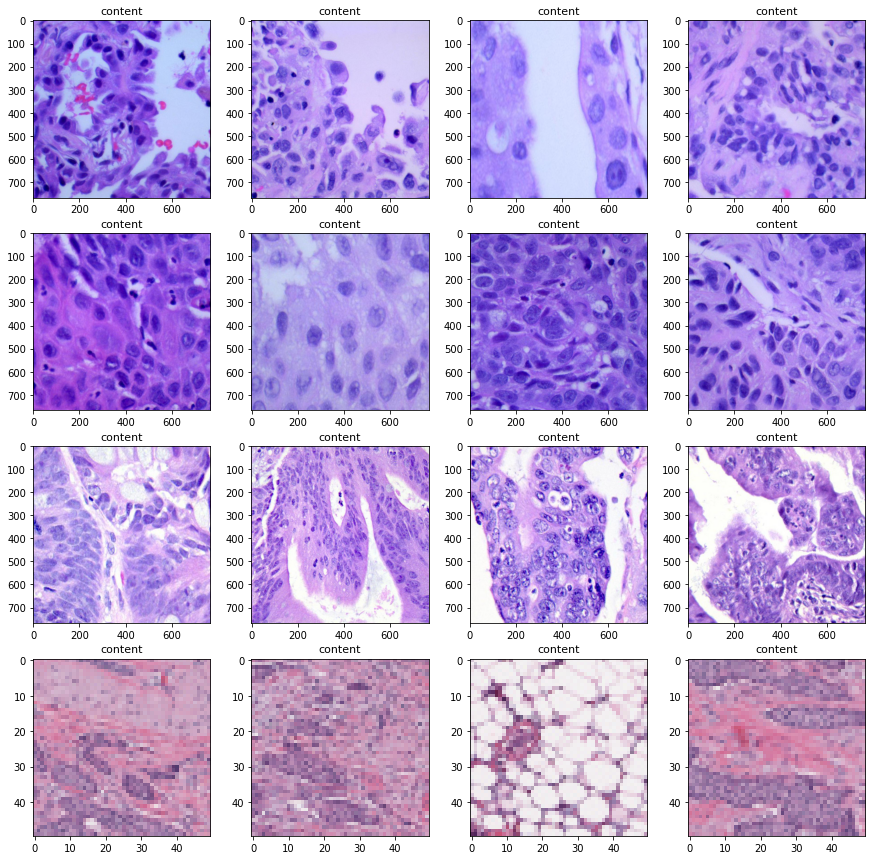

In [ ]:
import matplotlib.pyplot as plt
# plot a grid of 12 images (4 images of each class)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(15,15)
#merge the covid and normal list
merged_list = lung_aca_pic+lung_scc_pic+colon_aca_pic+breast_ca_pic
for i , img_path in enumerate(merged_list):
  data= img_path.split('/', 4)[1] 
  sp = plt.subplot(rows, cols, i + 1)
  sp.axis('On')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize=11)
  plt.imshow(img,cmap='gray') 

  plt.show

**Resizing all images and creating the variables x and y**

In [ ]:
x = []
y = []

for i in tqdm(os.listdir(train_lung_aca_dir)):
    path = os.path.join(train_lung_aca_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung adenocarcinoma')

for i in tqdm(os.listdir(train_lung_scc_dir)):
    path = os.path.join(train_lung_scc_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung squamous cell carcinoma')

for i in tqdm(os.listdir(train_colon_aca_dir)):
    path = os.path.join(train_colon_aca_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Colon adenocarcinoma')

for i in tqdm(os.listdir(train_breast_ca_dir)):
    path = os.path.join(train_breast_ca_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Breast carcinoma')    

100%|██████████| 5515/5515 [43:12<00:00,  2.13it/s]


In [ ]:
for i in tqdm(os.listdir(test_lung_aca_dir)):
    path = os.path.join(test_lung_aca_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung adenocarcinoma')

for i in tqdm(os.listdir(test_lung_scc_dir)):
    path = os.path.join(test_lung_scc_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Lung squamous cell carcinoma')

for i in tqdm(os.listdir(test_colon_aca_dir)):
    path = os.path.join(test_colon_aca_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Colon adenocarcinoma')

for i in tqdm(os.listdir(test_breast_ca_dir)):
    path = os.path.join(test_breast_ca_dir,i)
    img = cv2.imread(path)
    img = cv2.resize(img,(224,224))
    x.append(img)
    y.append('Breast carcinoma')  

100%|██████████| 1182/1182 [09:00<00:00,  2.19it/s]


In [ ]:
x = np.array(x)
y = np.array(y)
x.shape,y.shape

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


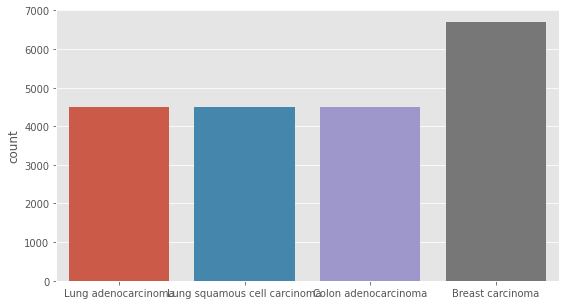

In [ ]:
import seaborn as sns
plt.style.use("ggplot")
plt.figure(figsize=(9,5))
sns.countplot(y)
plt.show()

**Data labelling**

In [ ]:
y

array(['Lung adenocarcinoma', 'Lung adenocarcinoma',
       'Lung adenocarcinoma', ..., 'Breast carcinoma', 'Breast carcinoma',
       'Breast carcinoma'], dtype='<U28')

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y = to_categorical(y)#num_classes = 3
y.shape

(20197, 4)

**Data splitting**

When developing a deep learning-based method, using a rigorous evaluation process is essential to avoid overfitting to training data or the generation of fake information. In order to evaluate the performance of the network, it is generally recommended to split data into training, valid, and test sets. The training set data are used to determine the network parameters. In most cases, the network shows good performance for the training set after

In [ ]:
from sklearn.utils import shuffle
x,y = shuffle(x,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
y_test.shape

(4040, 4)

**Data Augmentation**

The amount of data gathered was very low and could cause the models to under-fit. Hence, we would use a brilliant technique of Data Augmentation to increase the amount of data. This technique relies on rotations, flips, change in exposure, etc to create similar images. Using this technique we can increase the size of data by a high factor. The output image of the cropping stage is given as input to ImageDataGenerator which is a function in keras.preprocessing.image library. This function takes multiple arguments that decide how Augmentation takes place.

In [ ]:
# generate training,testing and validation batches 
dgen_train = ImageDataGenerator(rescale =1./255,
                                validation_split=0.2,
                                zoom_range = 0.2,
                                horizontal_flip =True)
dgen_validation = ImageDataGenerator(rescale = 1./255)
dgen_test = ImageDataGenerator(rescale =1./255)

train_generator_lung = dgen_train.flow_from_directory(l_train_dir,
                                                 target_size=(224,224),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

train_generator_colon = dgen_train.flow_from_directory(c_train_dir,
                                                 target_size=(224,224),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')
train_generator_breast = dgen_train.flow_from_directory(b_train_dir,
                                                 target_size=(224,224),
                                                 subset='training',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_generator_lung = dgen_test.flow_from_directory(l_test_dir,
                                                 target_size=(224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_generator_colon = dgen_test.flow_from_directory(c_test_dir,
                                                 target_size=(224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_generator_breast = dgen_test.flow_from_directory(b_test_dir,
                                                 target_size=(224,224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_generator_lung = dgen_train.flow_from_directory(l_val_dir,
                                                 target_size=(224,224),
                                                 subset='validation',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_generator_colon = dgen_train.flow_from_directory(c_val_dir,
                                                 target_size=(224,224),
                                                 subset='validation',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_generator_breast = dgen_train.flow_from_directory(b_val_dir,
                                                 target_size=(224,224),
                                                 subset='validation',
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6400 images belonging to 2 classes.
Found 3200 images belonging to 1 classes.
Found 4412 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 500 images belonging to 1 classes.
Found 1182 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 1 classes.
Found 236 images belonging to 2 classes.


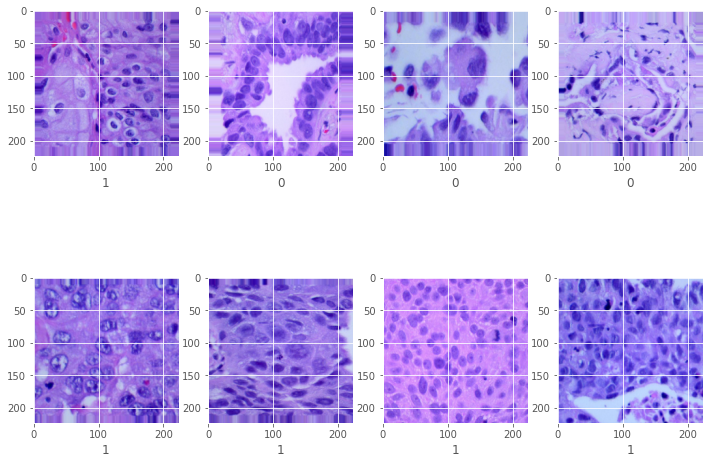

In [ ]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_generator_lung)
plt.figure(figsize=(12,9))
for i in range(8): 
    plt.subplot(2,4,i+1) 
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

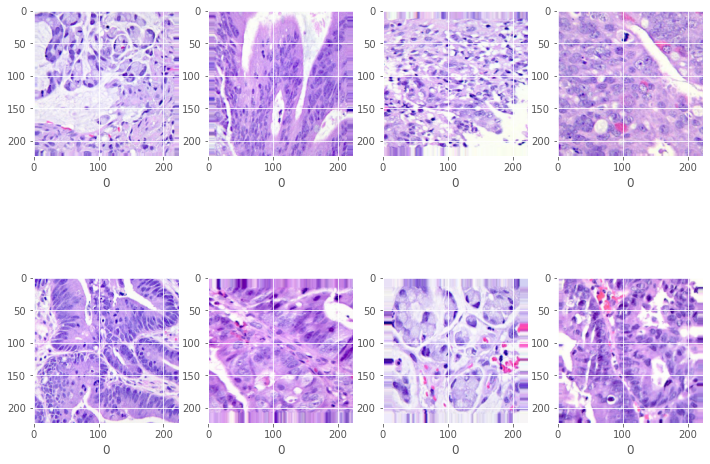

In [ ]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_generator_colon)
plt.figure(figsize=(12,9))
for i in range(8): 
    plt.subplot(2,4,i+1) 
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

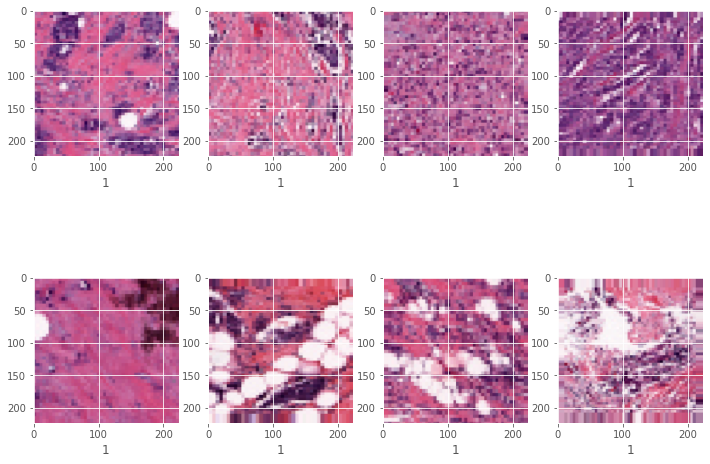

In [ ]:
from tensorflow.keras.preprocessing import image
sample_x,sample_y = next(train_generator_breast)
plt.figure(figsize=(12,9))
for i in range(8): 
    plt.subplot(2,4,i+1) 
    sample = image.array_to_img(sample_x[i])
    plt.xlabel(np.argmax(sample_y[i]))
    plt.imshow(sample)
plt.show()

In [ ]:
#get the lung class indices
train_generator_lung.class_indices

{'lung_aca': 0, 'lung_scc': 1}

In [ ]:
#get the colon class indices
train_generator_colon.class_indices

{'colon_aca': 0}

In [ ]:
#get the breast class indices
train_generator_breast.class_indices

{'.ipynb_checkpoints': 0, 'breast_ca': 1}

**Xception Model**

Xception Model is proposed by Francois Chollet. Xception is an extension of the inception Architecture which replaces the standard Inception modules with depthwise Separable Convolutions.
It significantly outperforms Inception V3 on a larger image classification dataset comprising 350 million images and 17,000 classes. Since the Xception architecture has the same number of parameters as Inception V3, the performance gains are not due to increased capacity but rather to a more efficient use of model parameters.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as numpy
import matplotlib.pyplot as pyplot
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
def create_model(base_model):
    base_model.trainable = True
    global_average_layer = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
    prediction_layer = tf.keras.layers.Dense(4, activation='softmax')(global_average_layer)
    model = tf.keras.models.Model(inputs=base_model.input, outputs=prediction_layer)
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics='categorical_accuracy')
    return model

In [ ]:
batch_size = 32
epochs = 100
def fit_model(model):
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epochs, 
                        validation_data=(x_test, y_test)
                        )
    return history

In [ ]:
IMG_SHAPE = (224, 224, 3)
base_model = tf.keras.applications.Xception(input_shape=IMG_SHAPE, include_top=False, weights="imagenet")
model = create_model(base_model)

**Fitting the model**

In [ ]:
history = fit_model(model)
model.save('Xception')

Epoch 1/100
505/505 [==============================] - 201s 391ms/step - loss: 0.1888 - categorical_accuracy: 0.9477 - val_loss: 0.0089 - val_categorical_accuracy: 0.9968
Epoch 2/100
505/505 [==============================] - 197s 390ms/step - loss: 0.0114 - categorical_accuracy: 0.9960 - val_loss: 0.0382 - val_categorical_accuracy: 0.9864
Epoch 3/100
505/505 [==============================] - 197s 390ms/step - loss: 0.0136 - categorical_accuracy: 0.9960 - val_loss: 0.0176 - val_categorical_accuracy: 0.9943
Epoch 4/100
505/505 [==============================] - 197s 389ms/step - loss: 0.0050 - categorical_accuracy: 0.9983 - val_loss: 0.0060 - val_categorical_accuracy: 0.9975
Epoch 5/100
505/505 [==============================] - 197s 390ms/step - loss: 0.0036 - categorical_accuracy: 0.9989 - val_loss: 0.0014 - val_categorical_accuracy: 0.9995
Epoch 6/100
505/505 [==============================] - 197s 390ms/step - loss: 0.0023 - categorical_accuracy: 0.9993 - val_loss: 0.0644 - val_cat

**Model Performance Evaluation**


In [ ]:
def plot_history(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

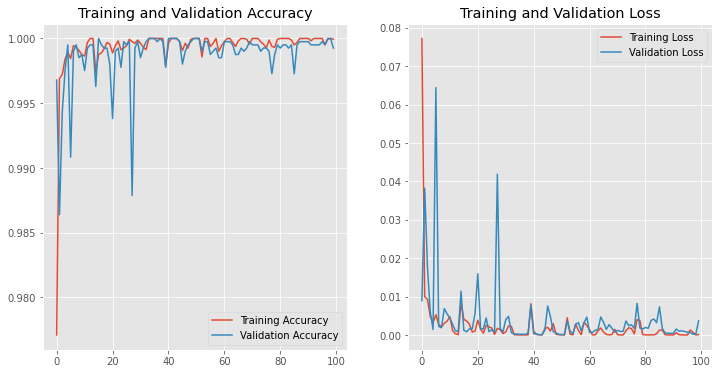

In [ ]:
plot_history(history)

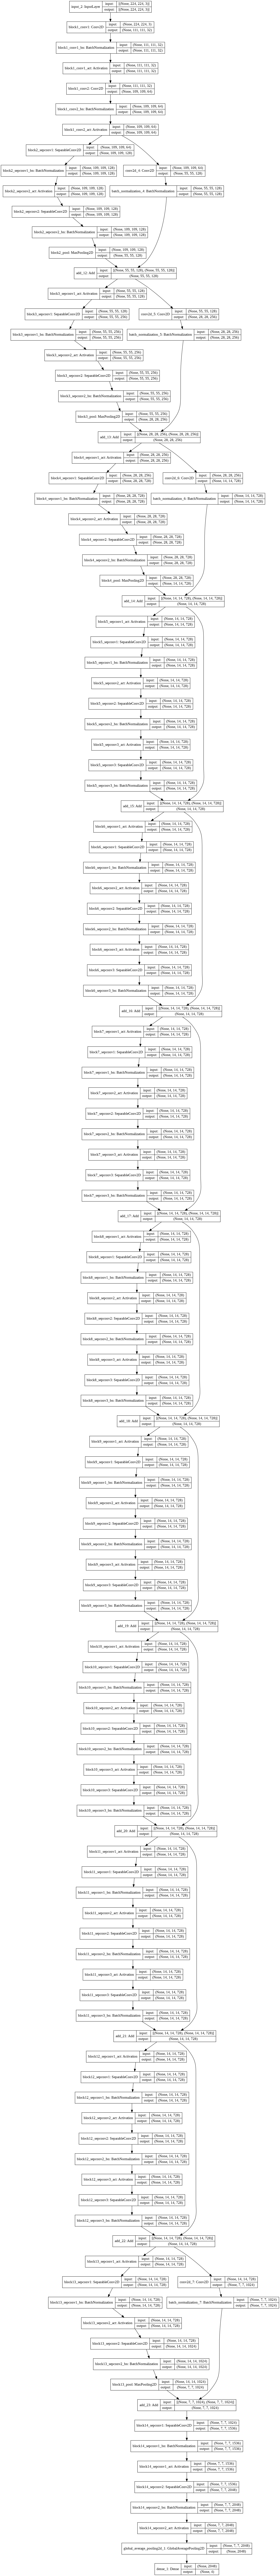

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'Xception model.png', show_shapes=True)

**Accuracy and loss for training dataset**

In [ ]:
print('Xception accuracy:', history.history['categorical_accuracy'][-1])
print('Xception loss:', history.history['loss'][-1])

Xception accuracy: 0.9999381303787231
Xception loss: 0.00011627245112322271


**Accuracy and loss for test dataset**

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)

127/127 [==============================] - 10s 75ms/step - loss: 0.0037 - categorical_accuracy: 0.9993


In [ ]:
print(f"Xception Test Loss: {test_loss}")
print(f"Xception Test Accuracy: {test_acc}")

Xception Test Loss: 0.0036749353166669607
Xception Test Accuracy: 0.9992574453353882


As we can see we got excellent accuracy and loss socres both for the training and test set.

**Confusion Matrix**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
y_pred= model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
unique,counts = np.unique(y_pred,return_counts=True)
print(unique,counts)
y_test_new = np.argmax(y_test,axis=1)

[0 1 2 3] [1323  876  921  920]


In [ ]:
clf_report = classification_report(y_test_new,y_pred)
print(clf_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1323
           1       1.00      1.00      1.00       876
           2       1.00      1.00      1.00       918
           3       1.00      1.00      1.00       923

    accuracy                           1.00      4040
   macro avg       1.00      1.00      1.00      4040
weighted avg       1.00      1.00      1.00      4040



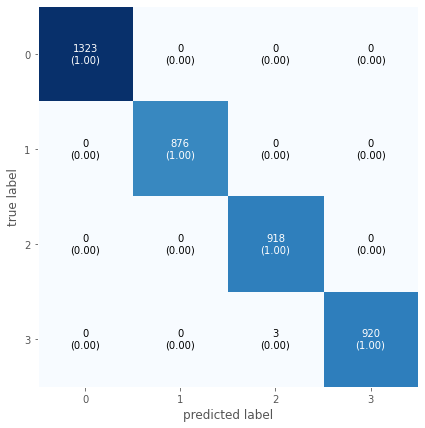

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test_new,y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(8,7),
                     show_normed=True);

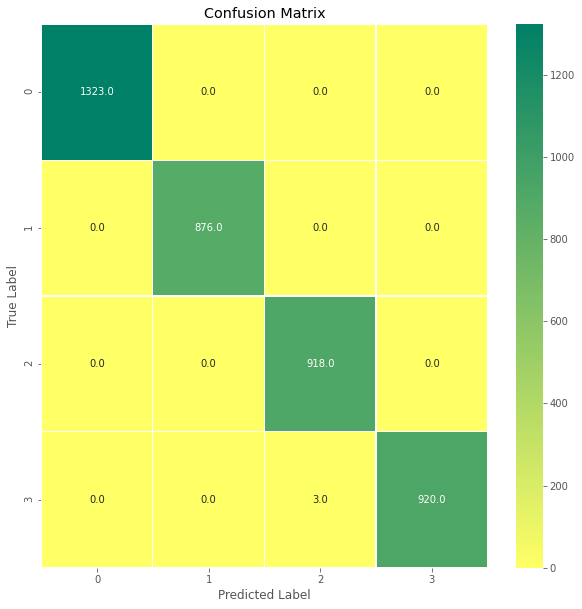

In [ ]:
# Predict the values from the test dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert test observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="summer_r", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

**Prediction On New Data**

We use the our model for predicting on new data.

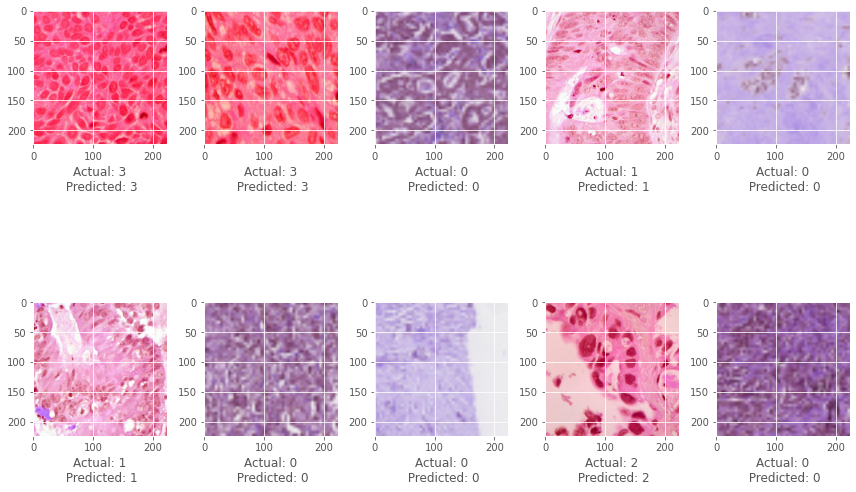

In [ ]:
plt.figure(figsize=(12,9))
for i in range(10):
    sample_idx = random.choice(range(len(x_test)))
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[sample_idx])
    plt.xlabel(f"Actual: {y_test_new[sample_idx]}\n Predicted: {y_pred[sample_idx]}")
    
plt.tight_layout()
plt.show()

As we can see our model predicted with great accuracy each class of our dataset.